<a href="https://colab.research.google.com/github/biplavdotcom/Data-Warehouse-and-Data-Mining/blob/main/lab4/dwdm_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1

In [ ]:
import pandas as pd
import numpy as np


# Loading dataset
data = pd.read_csv('/content/data.csv')
X = data.values

Qno1 - K-Means Centroids:
  Centroid 1: (5.883, 5.745)
  Centroid 2: (1.825, 2.292)
  Centroid 3: (7.000, 1.000)


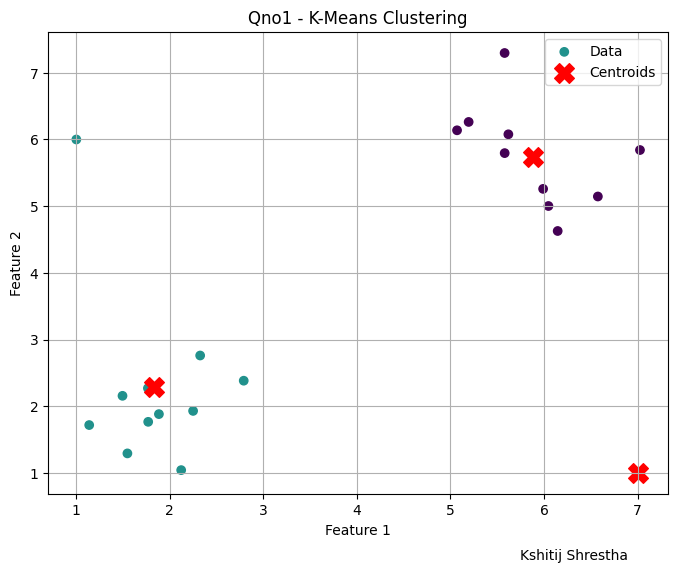

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt
import numpy as np

def k_means(X, k, max_iters=100):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centroids)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Run K-Means
centroids, labels = k_means(X, k=3)


print("Qno1 - K-Means Centroids:")
for i, c in enumerate(centroids, 1):
    print(f"  Centroid {i}: ({c[0]:.3f}, {c[1]:.3f})")


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label="Data")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("Qno1 - K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.figtext(0.85, 0.0, "Kshitij Shrestha", ha="right", fontsize=10, color='Black')
plt.grid(True)
plt.show()


# Q2

Qno2 - K-Means++ Centroids:
  Centroid 1: (1.908, 1.921)
  Centroid 2: (4.674, 6.262)
  Centroid 3: (6.464, 4.480)


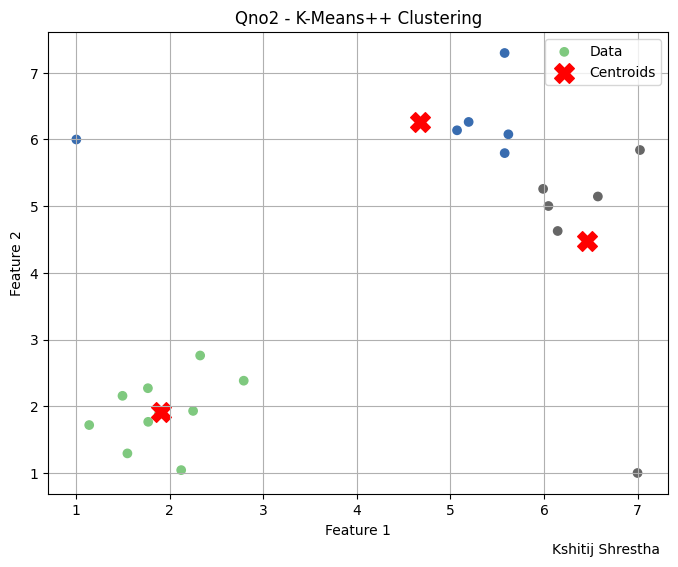

In [ ]:
def initialize_kmeans_plus_plus(X, k):
    centroids = [X[np.random.randint(len(X))]]
    for _ in range(1, k):
        distances = np.array([min([np.inner(x - c, x - c) for c in centroids]) for x in X])
        probabilities = distances / distances.sum()
        cumulative_probs = np.cumsum(probabilities)
        r = np.random.rand()
        for i, p in enumerate(cumulative_probs):
            if r < p:
                centroids.append(X[i])
                break
    return np.array(centroids)

def kmeans_plus_plus(X, k, max_iters=100):
    centroids = initialize_kmeans_plus_plus(X, k)
    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centroids)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Run K-Means++
centroids_pp, labels_pp = kmeans_plus_plus(X, k=3)


print("Qno2 - K-Means++ Centroids:")
for i, c in enumerate(centroids_pp, 1):
    print(f"  Centroid {i}: ({c[0]:.3f}, {c[1]:.3f})")


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_pp, cmap='Accent', label="Data")
plt.scatter(centroids_pp[:, 0], centroids_pp[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("Qno2 - K-Means++ Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.figtext(0.89, 0.01, "Kshitij Shrestha", ha="right", fontsize=10, color='Black')
plt.grid(True)
plt.show()

# Q3

Qno3 - K-Medoids Medoids:
  Medoid 1: (1.883, 1.883)
  Medoid 2: (6.047, 5.003)
  Medoid 3: (5.194, 6.263)


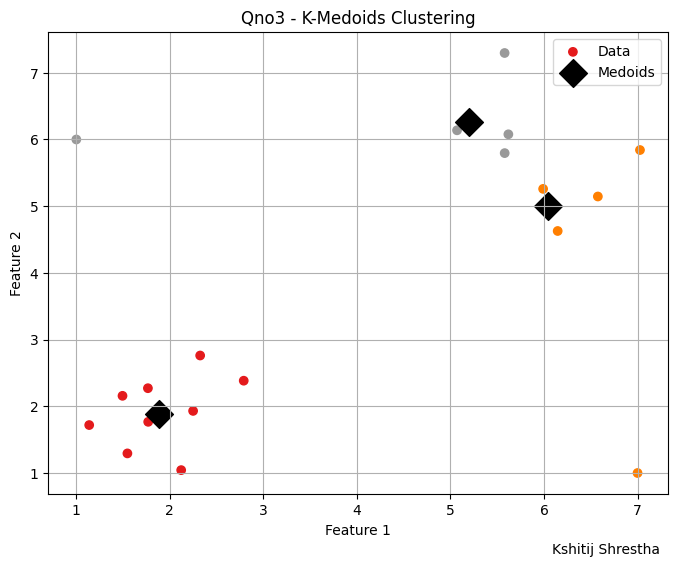

In [ ]:
from sklearn.metrics import pairwise_distances

def k_medoids(X, k, max_iters=100):
    m = len(X)
    medoid_indices = np.random.choice(m, k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iters):
        distances = pairwise_distances(X, medoids)
        labels = np.argmin(distances, axis=1)

        new_medoids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            dist_matrix = pairwise_distances(cluster_points, cluster_points)
            medoid_index = np.argmin(dist_matrix.sum(axis=1))
            new_medoids.append(cluster_points[medoid_index])

        new_medoids = np.array(new_medoids)

        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids

    return medoids, labels

# Run K-Medoids
medoids, labels_kmedoids = k_medoids(X, k=3)

print("Qno3 - K-Medoids Medoids:")
for i, c in enumerate(medoids, 1):
    print(f"  Medoid {i}: ({c[0]:.3f}, {c[1]:.3f})")


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmedoids, cmap='Set1', label="Data")
plt.scatter(medoids[:, 0], medoids[:, 1], c='black', marker='D', s=200, label="Medoids")
plt.title("Qno3 - K-Medoids Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.figtext(0.89, 0.01, "Kshitij Shrestha", ha="right", fontsize=10, color='Black')
plt.grid(True)
plt.show()

Q4

Clusters: [[21], [15, 10, 13, 19, 12, 14, 17, 18, 11, 16], [20, 1, 3, 6, 7, 9, 4, 8, 0, 2, 5]]


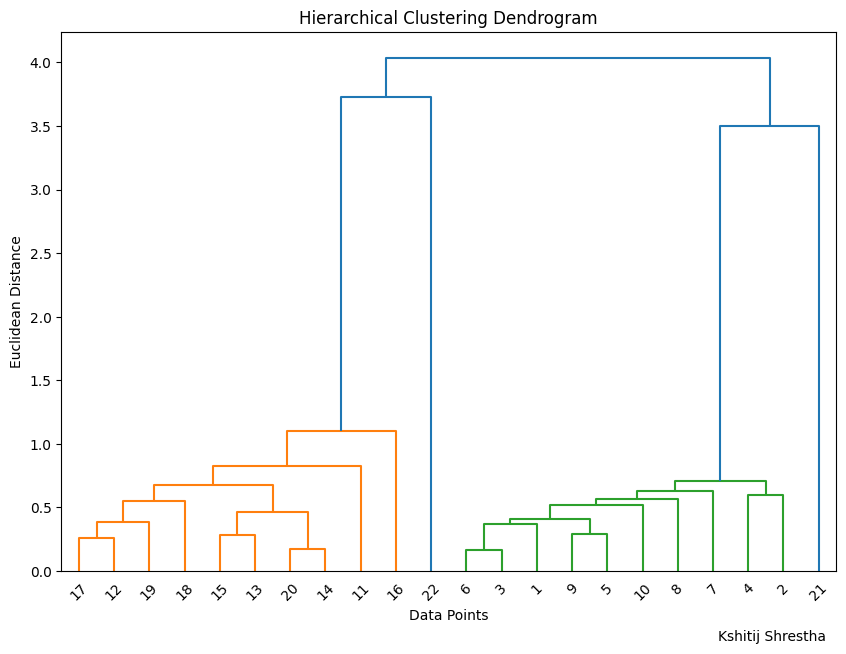

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def agglomerative_clustering(data, k):
    clusters = [[i] for i in range(len(data))]
    distances = squareform(pdist(data))

    np.fill_diagonal(distances, np.inf)

    while len(clusters) > k:
        i, j = np.unravel_index(np.argmin(distances), distances.shape)
        new_cluster = clusters[i] + clusters[j]
        clusters.append(new_cluster)

        # Update distances
        new_dist = np.minimum(distances[i], distances[j])
        distances = np.vstack([distances, new_dist])
        new_dist = np.append(new_dist, np.inf)
        distances = np.column_stack([distances, new_dist])

        # Remove merged clusters
        distances = np.delete(distances, [i, j], axis=0)
        distances = np.delete(distances, [i, j], axis=1)
        clusters.pop(max(i, j))
        clusters.pop(min(i, j))

    return clusters

data = pd.read_csv('/content/data.csv').values
clusters = agglomerative_clustering(data, k=3)
print("Clusters:", clusters)

# Create a linkage matrix for the dendrogram
linked = linkage(data, 'single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=range(1, len(data) + 1),
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.figtext(0.89, 0.01, "Kshitij Shrestha", ha="right", fontsize=10, color='Black')
plt.show()

Q5

Clusters: [[21], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 18, 20], [10, 11, 12, 13, 14, 15, 16, 17, 19]]


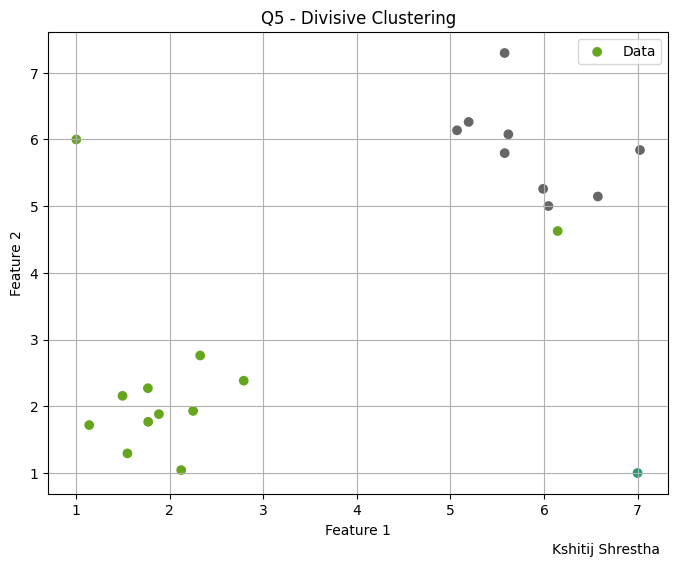

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt


def divisive(data, k):
    clusters = [list(range(len(data)))]

    while len(clusters) < k:
        # Find cluster with largest diameter
        max_diameter, split_idx = -1, -1
        for idx, cluster in enumerate(clusters):
            points = data[cluster]
            diam = np.max(pdist(points)) if len(points) > 1 else 0
            if diam > max_diameter:
                max_diameter = diam
                split_idx = idx

        to_split = clusters.pop(split_idx)
        points = data[to_split]
        # Use simple 2-means to split
        c1, c2 = np.mean(points, axis=0), points[np.argmax(np.linalg.norm(points - np.mean(points, axis=0), axis=1))]
        labels = [0 if np.linalg.norm(p - c1) < np.linalg.norm(p - c2) else 1 for p in points]

        cluster1 = [to_split[i] for i in range(len(to_split)) if labels[i]==0]
        cluster2 = [to_split[i] for i in range(len(to_split)) if labels[i]==1]

        clusters.extend([cluster1, cluster2])

    return clusters

from scipy.spatial.distance import pdist
data = pd.read_csv('/content/data.csv').values
clusters = divisive(data, k=3)
print("Clusters:", clusters)

# Assign labels to data points based on clusters
labels_divisive = np.zeros(len(data), dtype=int)
for i, cluster in enumerate(clusters):
    for point_index in cluster:
        labels_divisive[point_index] = i

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels_divisive, cmap='Dark2', label="Data")
plt.title("Q5 - Divisive Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.figtext(0.89, 0.01, "Kshitij Shrestha", ha="right", fontsize=10, color='Black')
plt.grid(True)
plt.show()

# Q6

In [ ]:
import numpy as np
import pandas as pd

def dbscan(data, eps, min_pts):
    labels = np.full(len(data), -1)
    cluster_id = 0

    def region_query(p):
        return [i for i, q in enumerate(data) if np.linalg.norm(p - q) < eps]

    for i in range(len(data)):
        if labels[i] != -1:
            continue
        neighbors = region_query(data[i])

        if len(neighbors) < min_pts:
            labels[i] = -1  # Noise
        else:
            labels[i] = cluster_id
            seeds = neighbors.copy()
            seeds.remove(i)
            while seeds:
                j = seeds.pop()
                if labels[j] == -1:
                    labels[j] = cluster_id
                if labels[j] != -1:
                    continue
                labels[j] = cluster_id
                new_neighbors = region_query(data[j])
                if len(new_neighbors) >= min_pts:
                    seeds.extend(new_neighbors)
            cluster_id += 1
    return labels

data = pd.read_csv('/content/data2.csv').values
labels = dbscan(data, eps=0.5, min_pts=5)
print("Cluster Labels:", labels)


Cluster Labels: [ 0  1  1  2  3  3  4  2  5  6  4  5  2  0  5  5  6  2  4  4  3  1  2  0
  4  4  4  4  3  3  1  1  6  4  2  7  3  3  2  4  4  8  6  1  3  8  1  1
  2  0  3  5  1  3  3  4  3  0  5  0  5  0  6  1  6  3  6  5  0  3  6  3
  2  6  3  3  1  9  6  3  1  4  6  5  5  0  2  6  5  4  1  3  7  6  1  8
  2  1  6  3  1 10  3  2  3  2  1  4  3  2  2  2  8  2  4  3  4  6  2  1
  6  3  2  2  1  1  5  2  0  6  2  6  0  2  6  3  1  7  6  3  5  5  5  6
  0  6  1  3  0  0  5  5  0  1  1  4  5  3  1  4  5  3  2  5  4  4  7  6
  5  4  6  0  1  4  2  5  3  6  2  5  2  6  2  3  2  6  0  3  0  4  3  8
  1  5  4  7  1  0  5  7 -1 -1 -1]


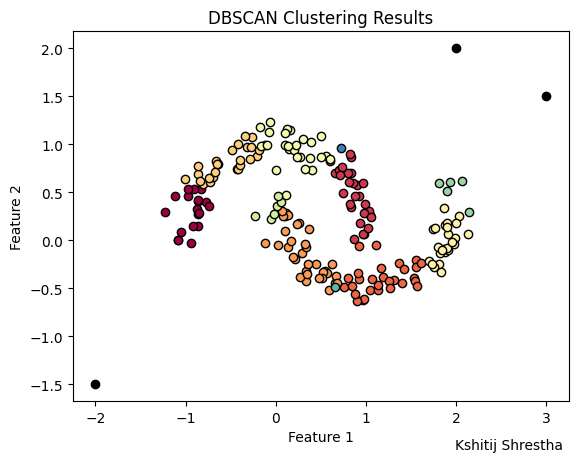

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data points, colored by their cluster label
# Noise points (label -1) are colored black
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.figtext(0.89, 0.01, "Kshitij Shrestha", ha="right", fontsize=10, color='Black')
plt.show()

# Q7

Outliers at indices: (array([14]),)


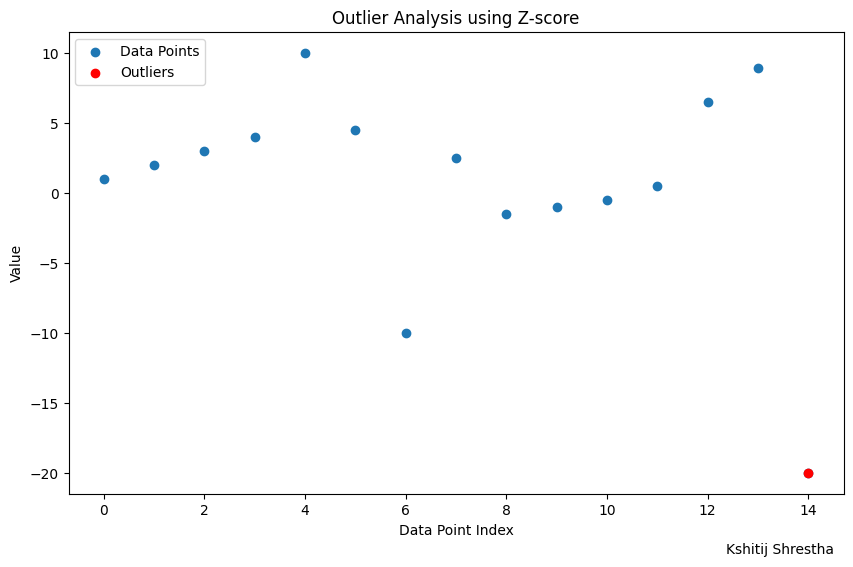

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def z_score_outliers(data, threshold=2):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.where(np.abs(z_scores) > threshold)

data = pd.read_csv('/content/data3.csv').values.flatten()
outliers = z_score_outliers(data)
print("Outliers at indices:", outliers)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, label='Data Points')
plt.scatter(outliers, data[outliers], color='red', label='Outliers')
plt.title('Outlier Analysis using Z-score')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.figtext(0.89, 0.01, "Kshitij Shrestha", ha="right", fontsize=10, color='Black')
plt.legend()
plt.show()

# Q8

Outliers at indices: (array([ 6, 14]),)


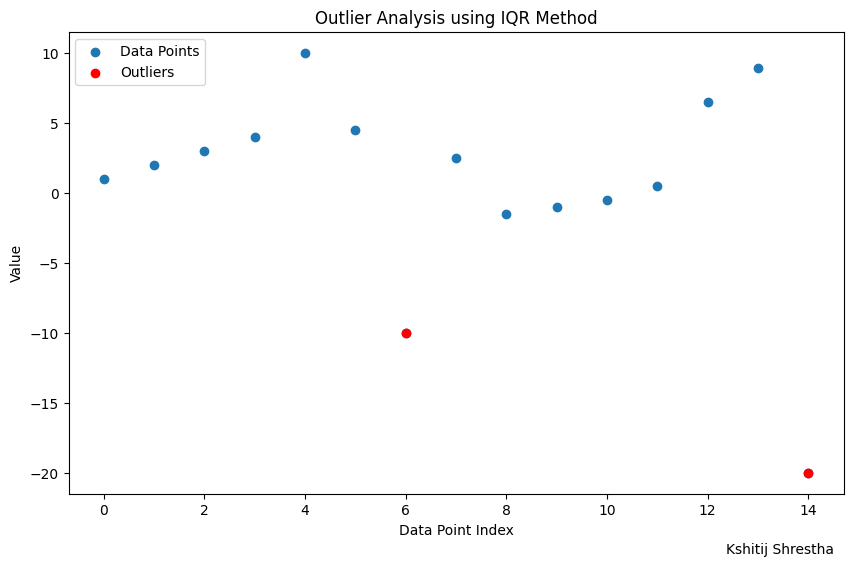

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return np.where((data < lower) | (data > upper))

data = pd.read_csv('/content/data3.csv').values.flatten()
outliers = iqr_outliers(data)
print("Outliers at indices:", outliers)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, label='Data Points')
plt.scatter(outliers, data[outliers], color='red', label='Outliers')
plt.title('Outlier Analysis using IQR Method')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.figtext(0.89, 0.01, "Kshitij Shrestha", ha="right", fontsize=10, color='Black')
plt.legend()
plt.show()

# Q9

Centroids: [[-6.70327449 -6.86553399]
 [-2.74832533  9.00200428]
 [ 4.49639795  2.22527489]]


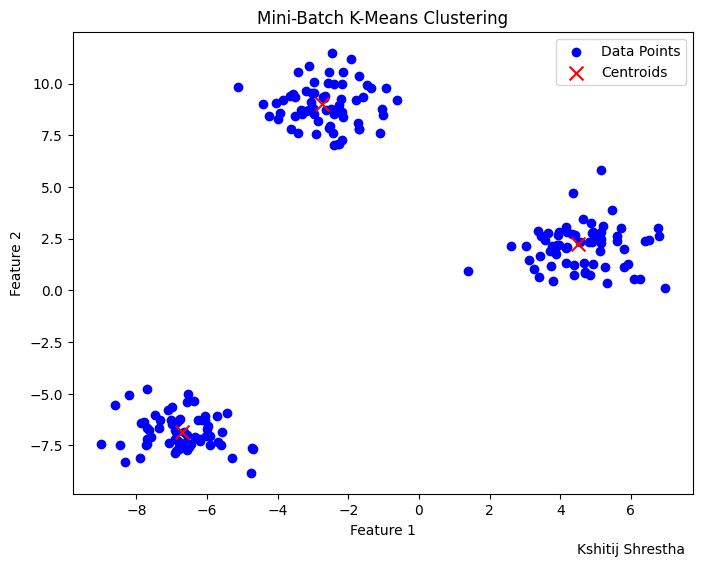

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def mini_batch_kmeans(data, k, batch_size=10, max_iter=100):
    n_samples, n_features = data.shape
    centroids = data[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iter):
        batch_idx = np.random.choice(n_samples, batch_size, replace=False)
        batch = data[batch_idx]
        labels = np.array([np.argmin([np.linalg.norm(x - c) for c in centroids]) for x in batch])

        for i in range(k):
            points = batch[labels == i]
            if len(points):
                centroids[i] = centroids[i] + 0.1 * (points.mean(axis=0) - centroids[i])  # update rule

    return centroids

data = pd.read_csv('/content/data4.csv').values
centroids = mini_batch_kmeans(data, k=3)
print("Centroids:", centroids)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Mini-Batch K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.figtext(0.89, 0.01, "Kshitij Shrestha", ha="right", fontsize=10, color='Black')
plt.legend()
plt.show()